 - **Osman Dogukan Kefeli** 
 - *090170119*


## Cubic Spline Interpolation

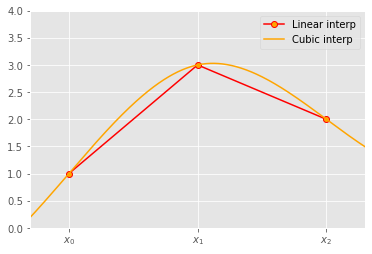

In [118]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.plot(range(3),[1,3,2],color='red',markerfacecolor="orange",marker="o", label="Linear interp")
plt.plot(x[:500],S1[:500],c='orange',label="Cubic interp")
plt.plot(x[500:],S2[500:],c='orange')

plt.legend()
plt.xlim((-0.3,2.3)); #";" reminded from old matlab memories :)
plt.ylim((0,4)); #";" reminded from old matlab memories :)
plt.xticks([0, 1, 2], ['$x_0$', '$x_1$','$x_2$']);

Assume we have n points to interpolate

Cubic Spline Interpolation fits individual functions for every adjacent points.

And all the function must satisfy boundary conditions.

General function for Cubic Spline is <br><br>
$S_j(x)=a_jx_1^3+b_jx_1^2+c_jx_1+d_j$ a 3rd order polynomial

for example j=1 $S_1(x)=a_1x_1^3+b_1x_1^2+c_1x_1+d_1$

this function must satisfy its adjacent $x$ point which is $x_2$

$S_0(x_1)=S_1(x_1)$  and first and second derivates must satisfy boundary conditions 

$S_0^{'}(x_1)=S_1^{'}(x_1)$ <br> $S_0^{''}(x_1)=S_1^{''}(x_1)$

with this situation our job is to calculate coefficients using Python

Let us construct a matrix for solutions $S_i(x_i)=y_i$

\begin{array}{rrrrr}
a_1 x_1^3 + & b_1 x_1^2 +  & c_1 x_1 +  & d_1 = &y_1,\\ 
a_2 x_2^3 + & b_2 x_2^2 +  & c_2 x_2 +  & d_2 = &y_2,\\ 
\cdots\\ 
a_{n-1} x_{n-1}^3 + &b_{n-1} x_{n-1}^2 + &c_{n-1} x_{n-1} +& d_{n-1} =& y_{n-1}.
\end{array}

Second matrix for the boundary condition. Function must satisfy next point

\begin{array}{rrrrr}
a_1 x_2^3 +&b_1 x_2^2 +&c_1 x_2 +&d_1 =& y_2,\\ 
a_2 x_3^3 +&b_2 x_3^2 +&c_2 x_3 +&d_2 =& y_3,\\
&&\cdots\\
a_{n-1} x_{n}^3 +&b_{n-1} x_{n}^2 +&c_{n-1} x_{n} +&d_{n-1} =& y_{n}.
\end{array}

And their first derrivatives must satisfy... $S^{\prime}_j(x_{j+1}) = S^{\prime}_{j+1}(x_{j+1})$

\begin{array}{rrrrrr}
3a_1 x_2^2 +&2b_1 x_2 +&c_1 - &3a_2 x_2^2 - &2b_2 x_2 - &c_2 =0,\\ 
3a_2 x_3^2 +&2b_2 x_3 +&c_2 -& 3a_3 x_3^2 -& 2b_3 x_3 -& c_3 =0,\\ 
&&&\cdots&&,\\
3a_{n-2} x_{n-1}^2 +&2b_{n-2} x_{n-1} +&c_{n-2} -& 3a_{n-1} x_{n-1}^2 -& 2b_{n-1} x_{n-1} -& c_{n-1} =0.
\end{array}

Also second derrivatives $S^{\prime\prime}_j(x_{j+1}) = S^{\prime\prime}_{j+1}(x_{j+1})$

\begin{split}
\begin{array}{rrrrrr}
6a_1 x_2 +& 2b_1 -& 6a_2 x_2 -& 2b_2 =& 0,\\
6a_2 x_3 +& 2b_2 -& 6a_3 x_3 -& 2b_3 =& 0,\\
+&&\ldots -& \\
6a_{n-2} x_{n-1} +& 2b_{n-2} -& 6a_{n-1} x_{n-1} -& 2b_{n-1} =& 0.
\end{array}
\end{split}

Finally for the endpoint constraints $S''_1(x_1) = 0$ and $S''_{n−1}(x_n)=0$ we

\begin{array}{rr}
6a_1 x_1 +& 2b_1 = 0,\\
6a_{n-1} x_n +&2b_{n-1} = 0.
\end{array}



$\left[\begin{array}{llllllll}
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 8 & 4 & 2 & 1\\
3 & 2 & 1 & 0 & -3 & -2 & -1 & 0\\
6 & 2 & 0 & 0 & -6 & -2 & 0 & 0\\
0 & 2 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 12 & 2 & 0 & 0
\end{array}\right]
\left[\begin{array}{c}
a_1 \\
b_1 \\
c_1 \\
d_1 \\
a_2 \\
b_2 \\
c_2 \\
d_2
\end{array}\right] =
\left[\begin{array}{c}
1 \\
3 \\
3 \\
2 \\
0 \\
0 \\
0 \\
0 \end{array}\right]$

In [95]:
b = np.array([1, 3, 3, 2, 0, 0, 0, 0]).reshape(-1,1)
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], 
              [0, 0, 0, 0, 1, 1, 1, 1], 
              [1, 1, 1, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 8, 4, 2, 1], 
              [3, 2, 1, 0, -3, -2, -1, 0], 
              [6, 2, 0, 0, -6, -2, 0, 0],
              [0, 2, 0, 0, 0, 0, 0, 0], 
              [0, 0, 0, 0, 12, 2, 0, 0]])
A,b

(array([[ 0,  0,  0,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  8,  4,  2,  1],
        [ 3,  2,  1,  0, -3, -2, -1,  0],
        [ 6,  2,  0,  0, -6, -2,  0,  0],
        [ 0,  2,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 12,  2,  0,  0]]),
 array([[1],
        [3],
        [3],
        [2],
        [0],
        [0],
        [0],
        [0]]))

In [101]:
Coeffs = np.dot(np.linalg.inv(A), b)
Coeffs=Coeffs.reshape(1,-1)[0]
Coeffs

array([-0.75,  0.  ,  2.75,  1.  ,  0.75, -4.5 ,  7.25, -0.5 ])

\begin{eqnarray*}
S_1(x) &=& -.75x^3 + 2.75x + 1, \quad  for \quad 0 \le x \le 1\ and\\
S_2(x) &=& .75x^3 - 4.5x^2 + 7.25x - .5, \quad  for  \quad 1 \le x \le 2
\end{eqnarray*}

In [112]:
x=np.linspace(-1,3,1000)
S1=Coeffs[0]*x**3+Coeffs[2]*x+Coeffs[3]
S2=Coeffs[4]*x**3+Coeffs[5]*x**2+Coeffs[6]*x+Coeffs[7]

From now on we can evaluate any value between $x_0$ to $x_2$

For example lets calculate $ x=1.5$ <br>$S_2(1.5)=2.78125$

In [103]:
x=1.5
S2=Coeffs[4]*x**3+Coeffs[5]*x**2+Coeffs[6]*x+Coeffs[7]
S2

2.78125